In [28]:
from dateutil.parser import parse
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})


from IPython.display import set_matplotlib_formats, display
from cycler import cycler
import warnings
import seaborn as sns

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

warnings.filterwarnings("ignore")
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['image.cmap'] = "viridis"
plt.rcParams['image.interpolation'] = "none"
plt.rcParams['savefig.bbox'] = "tight"
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.numpoints'] = 1
plt.rc('axes', prop_cycle=(
  #  cycler('color', mglearn.plot_helpers.cm_cycle.colors) +
    cycler('linestyle', ['-', '-', "--", (0, (3, 3)), (0, (1.5, 1.5))])))

np.set_printoptions(precision=3, suppress=True)

pd.set_option("display.max_columns", 8)
pd.set_option('precision', 2)

_all_ = ['np', #'mglearn', 
         'display', 'plt', 'pd']

In [29]:
# importar data
df = pd.read_csv('df_m.csv', delimiter=',', index_col=0 ,parse_dates=True, decimal='.')
#df.head()
#df= df_t.sort_index()
df= df.drop(['rho_hs', 'rho_hp', 'mes'], axis=1)
#df.info()
#df.shape

In [30]:
sub = 'mora'
mora=df.columns[df.columns.str.startswith(sub)]
mora

Index(['mora', 'mora_privada', 'mora_factoring', 'mora_mepresto', 'mora_pp',
       'mora_tdc', 'mora_hip', 'mora_sobreg', 'mora_pyme', 'mora_agro',
       'mora_com', 'mora_gan', 'mora_cons', 'mora_g1', 'mora_g11', 'mora_g2',
       'mora_g21', 'mora_g3', 'mora_g4', 'mora_g5'],
      dtype='object')

In [31]:
df = df.drop(mora, axis=1)

In [32]:
valores_null = df.isnull().sum()
valores_null.sort_values() 

deuda          0
pib_const_f    0
pib_const_e    0
pib_const_d    0
pib_corr       0
              ..
licor          0
cerveza        0
pollo          0
pib_const_c    0
pib_const_h    0
Length: 80, dtype: int64

## Ajuste por IPC

In [33]:
df.columns

Index(['deuda', 'imae', 'imae_s', 'ipc', 'bvpsi', 'fob', 'zl_mtm', 'zl_impm',
       'zl_rexm', 'acp_pm', 'acp_tbm', 'acp_tnm', 'mcp', 'visitas', 'entrada',
       'gastotur', 'ibm', 'iim', 'banano', 'vacuno', 'porcino', 'pollo',
       'cerveza', 'licor', 'gasolina', 'diesel', 'pconst', 'pconst_cdad',
       'pconst_interior', 'concreto', 'cemento', 'itmbs', 'autos', 'apuestas',
       'g_electricidad', 'f_electricidad', 'depósitos', 'préstamos',
       'hipotecarios', 'comercio', 'consumo', 'construcción', 'primas', 'itm',
       'itdm', 'intm', 'activan', 'pasivan', 'activar', 'pasivar', 'dp_pib',
       'sob_consumo', 'sob_corpo', 'pib_cons', 'pib_corr', 'pib_const_d',
       'pib_const_e', 'pib_const_f', 'pib_const_g', 'pib_const_i',
       'pib_const_j', 'pib_const_m', 'ingresos_ind', 'ingresos_cmayor',
       'ingresos_cmenor', 'ingresos_hot', 'ingresos_serv', 'ingresos_tot',
       'rem_ind', 'rem_cmayor', 'rem_cmenor', 'rem_hot', 'rem_serv', 'rem_tot',
       'ied', 'ied_empre

In [34]:
var = ['deuda', 'ipc', 'fob', 'zl_impm', 'zl_rexm', 'acp_pm', 'gastotur', 'ibm', 'iim','banano',
       'gasolina', 'diesel', 'itmbs', 'apuestas', 'depósitos', 'préstamos', 'hipotecarios', 'comercio', 'consumo', 
       'construcción','itm', 'itdm', 'intm', 'activan', 'pasivan', 'activar', 'pasivar', 'dp_pib','pib_corr', 
       'ingresos_ind','ingresos_cmayor','ingresos_cmenor', 'ingresos_hot', 'ingresos_serv', 'ingresos_tot', 'rem_ind',
       'rem_cmayor', 'rem_cmenor', 'rem_hot','rem_serv', 'rem_tot', 'ied', 'ied_empresas', 'ied_bancos']

In [35]:
df_ipc = df[var]
#df_ipc.info()

In [36]:
df_ipc1 =df_ipc.apply(lambda x: x /df_ipc['ipc']) 

In [37]:
#sns.lineplot( x = df.index, y = np.log(df_ipc1.loc[:,'ingresos_cmenor']), data = df_ipc1, color = 'y')
#sns.lineplot( x = df.index, y = np.log(df_ipc.loc[:,'ingresos_cmenor']), data = df_ipc, color = 'y')

In [38]:
df_noipc = df[df.columns[~df.columns.isin(var)]]
df_noipc.columns

Index(['imae', 'imae_s', 'bvpsi', 'zl_mtm', 'acp_tbm', 'acp_tnm', 'mcp',
       'visitas', 'entrada', 'vacuno', 'porcino', 'pollo', 'cerveza', 'licor',
       'pconst', 'pconst_cdad', 'pconst_interior', 'concreto', 'cemento',
       'autos', 'g_electricidad', 'f_electricidad', 'primas', 'sob_consumo',
       'sob_corpo', 'pib_cons', 'pib_const_d', 'pib_const_e', 'pib_const_f',
       'pib_const_g', 'pib_const_i', 'pib_const_j', 'pib_const_m',
       'pib_const_a', 'pib_const_c', 'pib_const_h'],
      dtype='object')

In [60]:
df_1 = pd.concat([df_ipc1,df_noipc], axis=1)
df_1 =df_1.sort_index()
#df_1.info()

## Tratamiento de Variables

In [40]:
# Pruebas de Estacionariedad
from statsmodels.tsa.stattools import adfuller, kpss
resultado_adf = { 'variable' : ['variable'],
                  'estadistico ADF': 0,
                  'p-valor': 0,
                  'critico 1%': 0,
                  'critico 5%': 0,
                  'critico 10%': 0}
resultado_adf = pd.DataFrame( data = resultado_adf)
resultado_adf

resultado_kpss = {'variable' : ['variable'],
                  'estadistico KPSS': 0,
                  'p-valor': 0,
                  'critico 1%': 0,
                  'critico 5%': 0,
                  'critico 10%': 0}
resultado_kpss = pd.DataFrame( data = resultado_kpss)
resultado_kpss

def estacionariedad(data):
# ADF
    global resultado_adf
    result_adf = adfuller(data[variable].values, autolag='AIC')
    resultado1 = { 'variable' : variable
                  ,'estadistico ADF':result_adf[0]
                  ,'p-valor': result_adf[1]
                  ,'critico 1%': result_adf[4]['1%']
                  ,'critico 5%': result_adf[4]['5%']
                  ,'critico 10%':result_adf[4]['10%']}
    
    resultado_adf = resultado_adf.append(resultado1, ignore_index=True)
# KPSS Test    
#    global resultado_kpss
#    result_kpss = kpss(data[variable].values, regression='c')
#    resultado2 = { 'variable' : variable
#                  ,'estadistico KPSS':result_kpss[0]
#                  ,'p-valor': result_kpss[1]
#                  ,'critico 1%': result_kpss[3]['1%']
#                  ,'critico 5%': result_kpss[3]['5%']
#                  ,'critico 10%':result_kpss[3]['10%']}
    
#    resultado_kpss = resultado_kpss.append(resultado2, ignore_index=True)

In [41]:
valores_null = df_1.isnull().sum()
valores_null.sort_values() 

deuda          0
licor          0
cerveza        0
pollo          0
porcino        0
              ..
activan        0
intm           0
itdm           0
pib_const_c    0
pib_const_h    0
Length: 80, dtype: int64

In [42]:
for variable in df_1:
    estacionariedad(data=df_1)
print(resultado_adf)
#print(resultado_kpss)

       variable  estadistico ADF  p-valor  critico 1%  critico 5%  critico 10%
0      variable             0.00     0.00        0.00        0.00         0.00
1         deuda             1.54     1.00       -3.51       -2.90        -2.59
2           ipc              NaN      NaN       -3.50       -2.89        -2.58
3           fob             1.55     1.00       -3.51       -2.90        -2.59
4       zl_impm            -2.08     0.25       -3.51       -2.90        -2.58
..          ...              ...      ...         ...         ...          ...
76  pib_const_j            -1.42     0.57       -3.51       -2.90        -2.59
77  pib_const_m            -2.06     0.26       -3.51       -2.90        -2.59
78  pib_const_a             0.57     0.99       -3.51       -2.90        -2.59
79  pib_const_c             2.57     1.00       -3.51       -2.90        -2.59
80  pib_const_h            -1.45     0.56       -3.51       -2.90        -2.59

[81 rows x 6 columns]


In [43]:
#resultado_adf[resultado_adf['variable'] == 'deuda']

In [44]:
#resultado_adf[resultado_adf['p-valor'] > 0.05].sort_values('p-valor')

In [45]:
adf_5 = resultado_adf[resultado_adf['p-valor'] > 0.05]  # variables a diferenciar
adf_4 = resultado_adf[resultado_adf['p-valor'] <= 0.05]

In [46]:
df_1log = np.log(df_1+1)
#df_1log.head()

In [47]:
#valores_null = df_1log.isnull().sum()
#valores_null.sort_values() 

In [48]:
#sns.lineplot( x = df_1.index, y = np.log(df_1.loc[:,'ied_empresas']), data = df_1, color = 'y')

In [49]:
var_diff = adf_5['variable'].unique()
df_1diff = df_1log[var_diff].diff().dropna()
df_1diff.head()

,deuda,fob,zl_impm,acp_pm,...,pib_const_m,pib_const_a,pib_const_c,pib_const_h
mes_ano,,,,,,,,,
2014-02-01,-4.18e-04,7.49e-03,-0.16,-5.44e-02,...,-3.92e-03,0.02,0.02,-1.43e-01
2014-03-01,3.54e-02,4.16e-02,-0.07,4.39e-02,...,9.32e-02,0.16,0.15,2.20e-02
2014-04-01,1.48e-02,-2.67e-02,0.34,-2.32e-02,...,-7.91e-02,-0.07,-0.21,-2.26e-01
2014-05-01,2.28e-03,1.33e-02,-0.16,2.56e-03,...,-5.91e-03,0.01,0.01,-1.54e-01
2014-06-01,7.59e-03,7.55e-02,0.10,-5.01e-02,...,3.48e-02,0.10,0.10,9.14e-03


In [50]:
df_1nodiff = df_1log[df_1log.columns[~df_1log.columns.isin(var_diff)]]
df_1nodiff.head()

,ipc,zl_rexm,diesel,hipotecarios,...,pconst_interior,f_electricidad,sob_consumo,sob_corpo
mes_ano,,,,,,,,,
2014-01-01,0.69,1.89,1.96,4.23,...,12.97,6.45,0.01,0.00e+00
2014-02-01,0.69,1.90,1.97,4.24,...,12.91,6.43,0.01,2.90e-03
2014-03-01,0.69,1.92,1.95,4.24,...,12.78,6.49,0.06,1.48e-02
2014-04-01,0.69,2.22,2.10,4.25,...,12.69,6.48,0.05,1.96e-02
2014-05-01,0.69,2.04,2.12,4.26,...,12.57,6.47,0.03,1.26e-02


In [51]:
data_modelo = df_1nodiff.merge(df_1diff, how='inner', on='mes_ano')
data_modelo.head()

,ipc,zl_rexm,diesel,hipotecarios,...,pib_const_m,pib_const_a,pib_const_c,pib_const_h
mes_ano,,,,,,,,,
2014-02-01,0.69,1.90,1.97,4.24,...,-3.92e-03,0.02,0.02,-1.43e-01
2014-03-01,0.69,1.92,1.95,4.24,...,9.32e-02,0.16,0.15,2.20e-02
2014-04-01,0.69,2.22,2.10,4.25,...,-7.91e-02,-0.07,-0.21,-2.26e-01
2014-05-01,0.69,2.04,2.12,4.26,...,-5.91e-03,0.01,0.01,-1.54e-01
2014-06-01,0.69,2.18,1.93,4.26,...,3.48e-02,0.10,0.10,9.14e-03


In [52]:
data_modelo.shape

(88, 80)

In [53]:
# viendo el fac de la variable construcción  y consumo la misma debe ser tratada en segunda diferencia
data_modelo['construcción'] = data_modelo['construcción'].diff()
data_modelo['consumo'] = data_modelo['consumo'].diff()
data_modelo['bvpsi'] = data_modelo['bvpsi'].diff()

In [54]:
data_modelo = data_modelo.dropna()
data_modelo.shape

(87, 80)

### Para grafica se debe cambiar el dataframe

In [67]:
index = range(df_1.shape[0])
index

range(0, 93)

In [68]:
df_2 = df_1.copy()
df_2.index = index 
df_2

,deuda,ipc,fob,zl_impm,...,pib_const_m,pib_const_a,pib_const_c,pib_const_h
0,108.34,1.0,0.39,5.94,...,27.20,52.15,43.85,101.93
1,108.29,1.0,0.41,4.94,...,27.09,53.30,44.81,88.21
2,112.23,1.0,0.47,4.52,...,29.83,62.42,52.48,90.20
3,113.92,1.0,0.43,6.79,...,27.49,58.38,42.46,71.75
4,114.19,1.0,0.45,5.66,...,27.32,59.18,43.04,61.37
...,...,...,...,...,...,...,...,...,...
88,247.24,1.0,1.02,4.56,...,29.72,73.94,170.38,26.56
89,255.53,1.0,2.71,4.76,...,30.81,81.98,188.90,26.81
90,254.12,1.0,1.80,4.67,...,31.50,103.01,293.74,37.44
91,254.46,1.0,2.06,5.07,...,32.22,99.53,283.83,36.06


In [69]:
#from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

def fac(data,variable):
# Original Series
    fig, axes = plt.subplots(3, 2, sharex=True)
    axes[0, 0].plot(data[variable]); axes[0, 0].set_title('Original Series')
    plot_acf(data[variable], ax=axes[0, 1])

# 1st Differencing
    axes[1, 0].plot(data[variable].diff()); axes[1, 0].set_title('1st Order Differencing')
    plot_acf(data[variable].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
    axes[2, 0].plot(data[variable].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
    plot_acf(data[variable].diff().diff().dropna(), ax=axes[2, 1])

    plt.show()

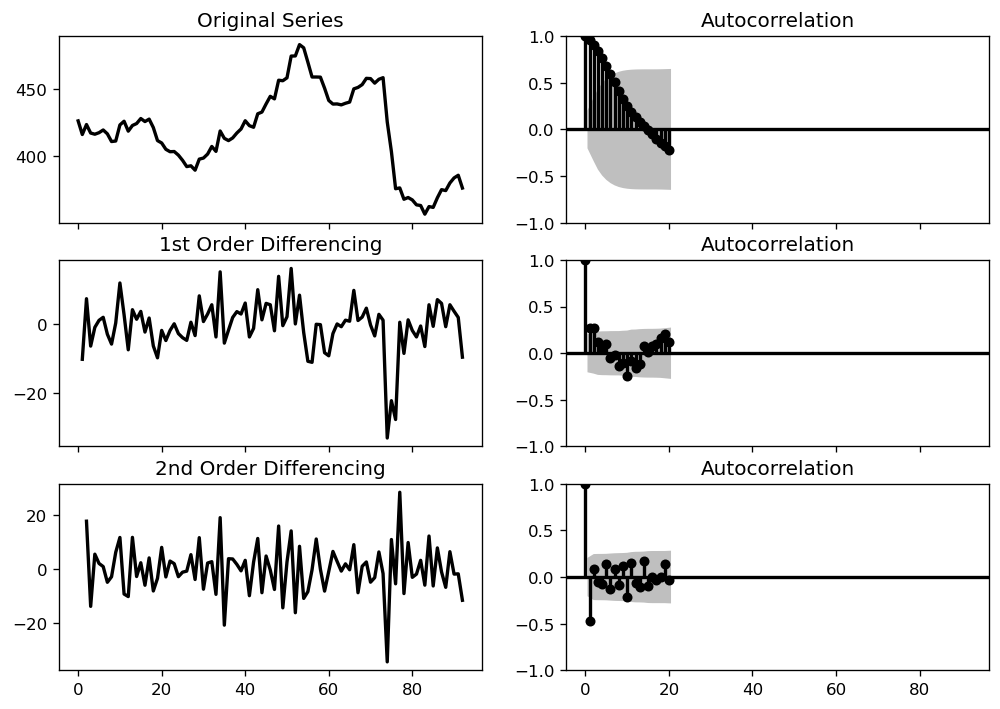

In [70]:
fac(df_2,'bvpsi')

In [ ]:
index = range(df_1.shape[1]+2)
df_ipc2 = df_ipc
#df_ipc2.columns =['ipc']
df_ipc2.index = index 
df_ipc2

In [ ]:
fac(df_ipc2,'ipc')